In [ ]:
from google.colab import files
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
all = [i for i in range(1,21)] # get all possible combinations of selecting 15 annotators from 20
combinations = list(itertools.combinations(all, 15))

In [ ]:
def CronbachAlpha(itemscores): #function to calculate cronbach alpha
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [ ]:
!gdown --id 1MxvEHNGvFgc9z2mbH8_HHzi7z7ISMpfL #tvsum50.xlsx

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1MxvEHNGvFgc9z2mbH8_HHzi7z7ISMpfL
To: /content/tvsum50.xlsx
100% 24.8M/24.8M [00:00<00:00, 171MB/s]


In [ ]:
dict_of_df = {} # initialize empty dictionary
for i in range(1,51):
    dict_of_df["df_{}".format(i)] = pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i, header=None) #saving every sheet as a dataframe in a dictionary

In [ ]:
# calculating cronbach alpha for all the possible combinations of 15 annotators
distribution = [] 
count = 0
for j in combinations:
  count += 1
  j = list(j)
  core = []
  for i in range(1,51):
    sa = dict_of_df["df_{}".format(i)]
    sa = sa.iloc[:,j]
    core.append(CronbachAlpha(sa.T))
  distribution.append(sum(core) / len(core))
  if count % 100 == 0:
    print((count/15504)," % complete")

In [ ]:
distribution = pd.read_excel(open('/content/cronbach_distribution.xlsx', 'rb'), header=None)
distribution = list(distribution[0])

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
max(distribution)

0.7893094909643795

In [ ]:
min(distribution)

0.7215954636410363

In [ ]:
avg = sum(distribution)/len(distribution)

In [ ]:
distribution.index(0.7893094909643795)

5368

In [ ]:
combinations[5368]

(0, 1, 2, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)

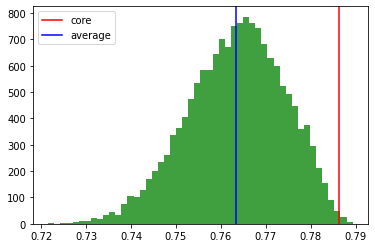

In [ ]:
import pylab as P

n, bins, patches = P.hist(distribution, 50, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)
plt.axvline(x = 0.7861599974870527, color = 'r', label = 'core')
plt.axvline(x = avg, color = 'b', label = 'average')
plt.legend()

## Segments

In [ ]:
df=pd.read_excel('segment_scores.xlsx', header=None)

In [ ]:
combinations = [[1, 2, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [ ]:
combinations = [[1,4,5,6,8,11,12,13,14,15,16,17,18,19,20]]

In [ ]:
distribution_segment = []
counts = 0
for i in combinations:
  i = list(i)
  counts += 1
  sa = df.iloc[1:,i]
  distribution_segment.append(CronbachAlpha(sa.T))
  if counts % 100 == 0:
    print((counts/15504)*100," % complete")

In [ ]:
distribution_segment # for original noise points

[0.8535818683074833]

In [ ]:
distribution_segment # for segment noise points

[0.8534337427963804]

In [ ]:
avg = sum(distribution_segment)/len(distribution_segment)

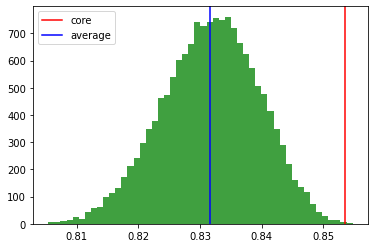

In [ ]:
import pylab as P

n, bins, patches = P.hist(distribution_segment, 50, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)
plt.axvline(x = 0.8535818683074833, color = 'r', label = 'core')
plt.axvline(x = avg, color = 'b', label = 'average')
plt.rcParams["figure.figsize"] = (15,10)
plt.legend()

In [ ]:
max(distribution_segment)

0.8547471217627861

In [ ]:
combinations[distribution_segment.index(0.8547471217627861)]

(1, 2, 4, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)